In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tqdm import tqdm
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

c:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(tf.__version__)

2.12.0


# **SETUP**

In [3]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [4]:
# Load data
import pathlib
lokasi = r"C:\Users\jonat\Downloads\Bangkit 2023 Capstone\WasteDataset"
data_dir = pathlib.Path(lokasi).with_suffix('')

# **Load Image**

**Contoh visualisasi data**

In [5]:
# plt.figure(figsize=(10,10))
# for gambar, kelas in train_data.take(1):
#     for i in range(6):
#         ax = plt.subplot(3, 3, i+1)
#         plt.imshow(gambar[i].numpy().astype("uint8"))
#         plt.title(nama_kelas[kelas[i]])
#         plt.axis("off")

NameError: name 'train_data' is not defined

<Figure size 1000x1000 with 0 Axes>

# **Data Preprocesing**

**Parameter**

In [6]:
batch_size = 32
img_height = 256
img_width = 256

**Splitting data train dan test**

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4552


**Format Data**

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 4552 files belonging to 6 classes.
Using 3642 files for training.


In [9]:
val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 4552 files belonging to 6 classes.
Using 910 files for validation.


In [10]:
nama_kelas = train_data.class_names
banyak_kelas = len(nama_kelas)
print(banyak_kelas)
print(nama_kelas)

6
['AluCan', 'Cardboard', 'Detergent', 'Glass', 'HDPEM', 'PET']


**Normalisasi data**

In [ ]:
# norm = tf.keras.layers.Rescaling(1./255)

In [ ]:
# train_batch = 
# val_batch = val_data/255.

**Info Batch**

In [11]:
# banyaknya batch dan ukuran data
for batch_gambar, batch_kelas in train_data:
    print(batch_gambar.shape)
    print(batch_kelas.shape)
    break

(32, 256, 256, 3)
(32,)


In [12]:
train_data = train_data.cache().prefetch(buffer_size=400)
val_data = val_data.cache().prefetch(buffer_size=400)

# **Buat Model**

In [13]:
# fine_tuning = False
# extractor = hub.KerasLayer(MODULE_HANDLE,
#                            input_shape=IMAGE_SIZE + (3,),
#                            output_shape=[FV_SIZE],
#                            trainable=fine_tuning)

In [29]:
from tensorflow.keras.optimizers import RMSprop

def create_model():

  model = tf.keras.models.Sequential([
    # Layer Normalisasi
    tf.keras.layers.Rescaling(1/255.),
    # Convo Pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Convo Kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # extractor,
    tf.keras.layers.Dense(6, activation='softmax')
])
  

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=val_data)

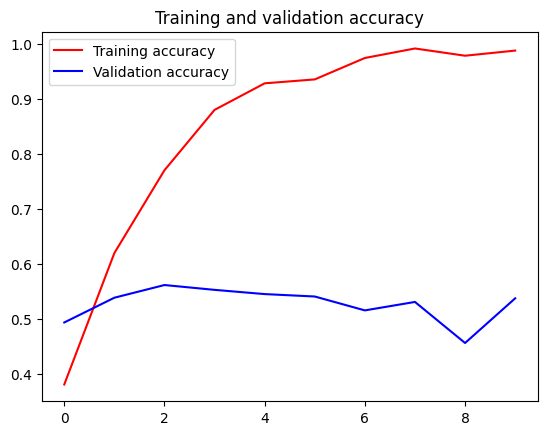

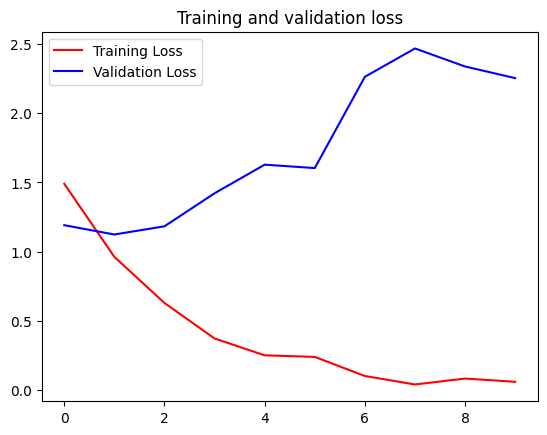

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()